## Examples of how to use the optimization class

First lets import all the modules needed and generate a solver object

In [1]:
import numpy as np
import os
os.chdir('..')

from rss import rSNAPsim
from rss import ProbeVectorFactory as pvf  
from rss import PropensityFactory as pff
from rss import TranslationSolvers as tss
from rss import TranslationOptimization as topt
from rss import IntensityData as data_obj
from rss import IntensityAnalyses as int_a
os.chdir('./interactive_notebooks')

import matplotlib.pyplot as plt
import time


#Generate a solver object
rsim = rSNAPsim()
rsim.open_seq_file('../gene_files/Bactin_withTags.txt')  #open this sequence
poi = rsim.proteins['1'][0]  #protein object
solver = tss()  #solver class
solver.protein=poi #give the solver acess
t = np.linspace(0,500,501)


.\generalized_cpp
importing models


dict_keys(['ragged', 'head', 'ssa_obj', 'intensity_vec', 'times', 'I_mu', 'I_var'])


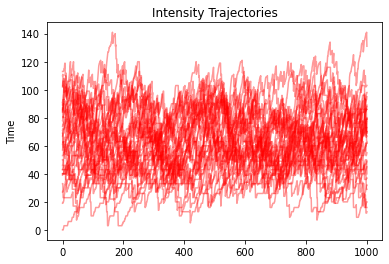

In [2]:
ki = [.08]
ke = [ 5]
colors = ['r']
i = 0
      
poi.ke_mu = ke[i] #half the speed
solver.default_conditions['burnin'] = 1000 #lets burnin for 1000s
solver.t = np.linspace(0,2000,2001)
solver.n_traj = 30
      
t = np.linspace(0,2000,2001)
ssa_soln = solver.solve_ssa([ki[i]] + poi.kelong + [10],t,n_traj=30)  
      
plt.plot(ssa_soln.intensity_vec[0],color=colors[i],alpha=.4)
plt.title('Intensity Trajectories')
plt.ylabel('Time')      
      
sim_data = data_obj()
sim_data.add_data(ssa_soln.time,ssa_soln.intensity_vec)
sim_data.get_stats()

print(sim_data.__dict__.keys())

### Lets generate a simulated data object with a specific parameter set

Text(0, 0.5, 'Time')

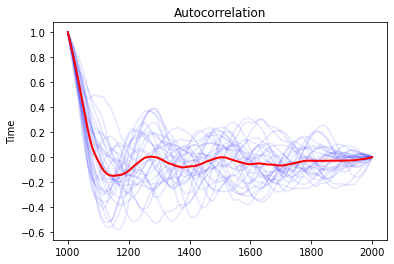

In [3]:
      
sim_acov, sim_acov_err = int_a().get_autocov(sim_data.intensity_vec,norm='ind')
sim_acc, sim_acc_err = int_a().get_autocorr(sim_acov)
sim_data.acorr = sim_acc
sim_data.acorr_err = sim_acc_err
sim_data.histogram = np.histogram(sim_data.intensity_vec,bins=30)[0]



plt.figure()
plt.plot(sim_data.times,sim_data.acorr[0], alpha=.1,color='b')
plt.plot(sim_data.times,np.mean(sim_data.acorr[0],axis=1),color='r',lw=2)

plt.title('Autocorrelation')
plt.ylabel('Time')



In [4]:
opt = topt()  #Optimization object
opt.solver_obj = solver
opt.data_obj = sim_data
opt.parnames = ['ki','ke']
true_par = [.08,5]
opt.opts['bounds'] = ([0.01,.17],[0.1,12])

opt.initial_params = np.array([.033,10])
opt.params = np.array([.033,10])


In [ ]:
opt.args['LL_acorr'] = (200,'ind','G0')

opt.run_optimization('LL_acorr','MH',stepsize=[1,1],disp=True,mut_rate=.99,logspace=True)


In [ ]:

chain = opt.chain
intensity = opt.intensity_fun(chain.bestpar)
fit_acorr,fit_acorr_error = opt.autocorrelation_fun(intensity)
fit_acorr = np.mean(fit_acorr[0],axis=1)

plt.plot(fit_acorr,'b',lw=3)
plt.plot(fit_acorr-fit_acorr_error[0],'b--')
plt.plot(fit_acorr+fit_acorr_error[0],'b--')


plt.plot(np.mean(opt.data_obj.acorr[0],axis=1),'r',lw=3)
plt.plot(np.mean(opt.data_obj.acorr[0],axis=1) -opt.data_obj.acorr_err[0] ,'r--',lw=1)
plt.plot(np.mean(opt.data_obj.acorr[0],axis=1) +opt.data_obj.acorr_err[0] ,'r--',lw=1)

plt.plot([200,200],[-.3,1],'k--')

In [ ]:
chain.parplot()

In [ ]:
plt.scatter(chain.parchain[:,0],chain.parchain[:,1])
plt.scatter([0.08],[5],color='red',s=150,marker='x')

plt.figure()
plt.plot(chain.evalchain)




In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 2000)

colors = chain.evalchain
colors[colors>2000] = 2000
viridis(colors)

fig,ax = plt.subplots(1,1)
a = ax.scatter(chain.parchain[1:,0],chain.parchain[1:,1], c = colors)
ax.scatter([0.08],[5],color='red',s=150,marker='x',vmin=0, vmax=2000)


fig.colorbar(a, ax=ax)
ax.set_xlabel('Ki')
ax.set_ylabel('Ke')

In [13]:

opt.args['LL_acorr'] = (200,'ind','G0')
opt.args['LL_I_distb'] = (30,True)
opt.run_optimization(['LL_acorr','LL_I_distb'],'MH',stepsize=[.6,.6],disp=True,mut_rate=.99)

Burning in....


C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:3181: RuntimeWarning: divide by zero encountered in log
  LL = -np.dot(self.data_obj.histogram,np.log(dist_sim_data))


current iteration: 100 out of 1000 | best_parameters: [-1.714784493618204, 0.3937161123199297] | best evaulation: 128166.254642
current iteration: 200 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 300 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 400 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 500 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 600 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 700 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | best evaulation: 122848.398354
current iteration: 800 out of 1000 | best_parameters: [-1.4700152030958133, 0.6399867201282662] | 

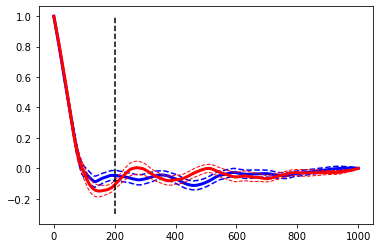

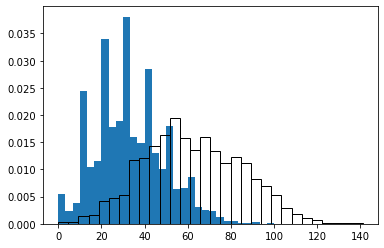

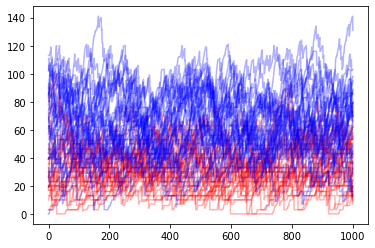

In [14]:
chain_2obj = opt.chain
intensity = opt.intensity_fun(chain_2obj.bestpar)
fit_acorr,fit_acorr_error = opt.autocorrelation_fun(intensity)
fit_acorr = np.mean(fit_acorr[0],axis=1)

plt.plot(fit_acorr,'b',lw=3)
plt.plot(fit_acorr-fit_acorr_error[0],'b--')
plt.plot(fit_acorr+fit_acorr_error[0],'b--')


plt.plot(np.mean(opt.data_obj.acorr[0],axis=1),'r',lw=3)
plt.plot(np.mean(opt.data_obj.acorr[0],axis=1) -opt.data_obj.acorr_err[0] ,'r--',lw=1)
plt.plot(np.mean(opt.data_obj.acorr[0],axis=1) +opt.data_obj.acorr_err[0] ,'r--',lw=1)

plt.plot([200,200],[-.3,1],'k--')

plt.figure()
int_hist = opt.intensity_distribution(intensity)
counts1, bins = np.histogram(intensity,density=True,bins=30)
plt.hist(bins[:-1], bins, weights=counts1)

counts2, bins = np.histogram(sim_data.intensity_vec,density=True,bins=30)
plt.hist(bins[:-1], bins, weights=counts2,fill=False)

plt.figure()
plt.plot(intensity[0],'r',alpha=.3)
plt.plot(sim_data.intensity_vec[0],'b',alpha=.3)

In [7]:
chain_2obj.evalchain.shape

(1101, 1)

Text(0, 0.5, 'Ke')

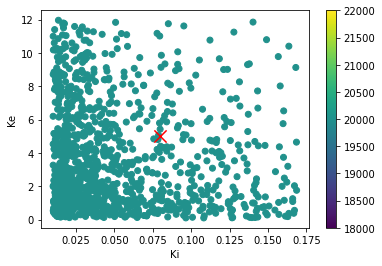

In [17]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 200000)

colors = chain_2obj.evalchain

colors[colors>200000] = 200000
viridis(colors)

fig,ax = plt.subplots(1,1)
b = ax.scatter(chain_2obj.parchain[:,0],chain_2obj.parchain[:,1], c = colors)
a = ax.scatter([0.08],[5],color='red',s=150,marker='x',vmin=0, vmax=2000)
#a = ax.scatter([chain_2obj.bestpar[0]],[chain_2obj.bestpar[1]],color='cyan',s=50,marker='o',vmin=0, vmax=2000)

fig.colorbar(b, ax=ax)
ax.set_xlabel('Ki')
ax.set_ylabel('Ke')

C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:3456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


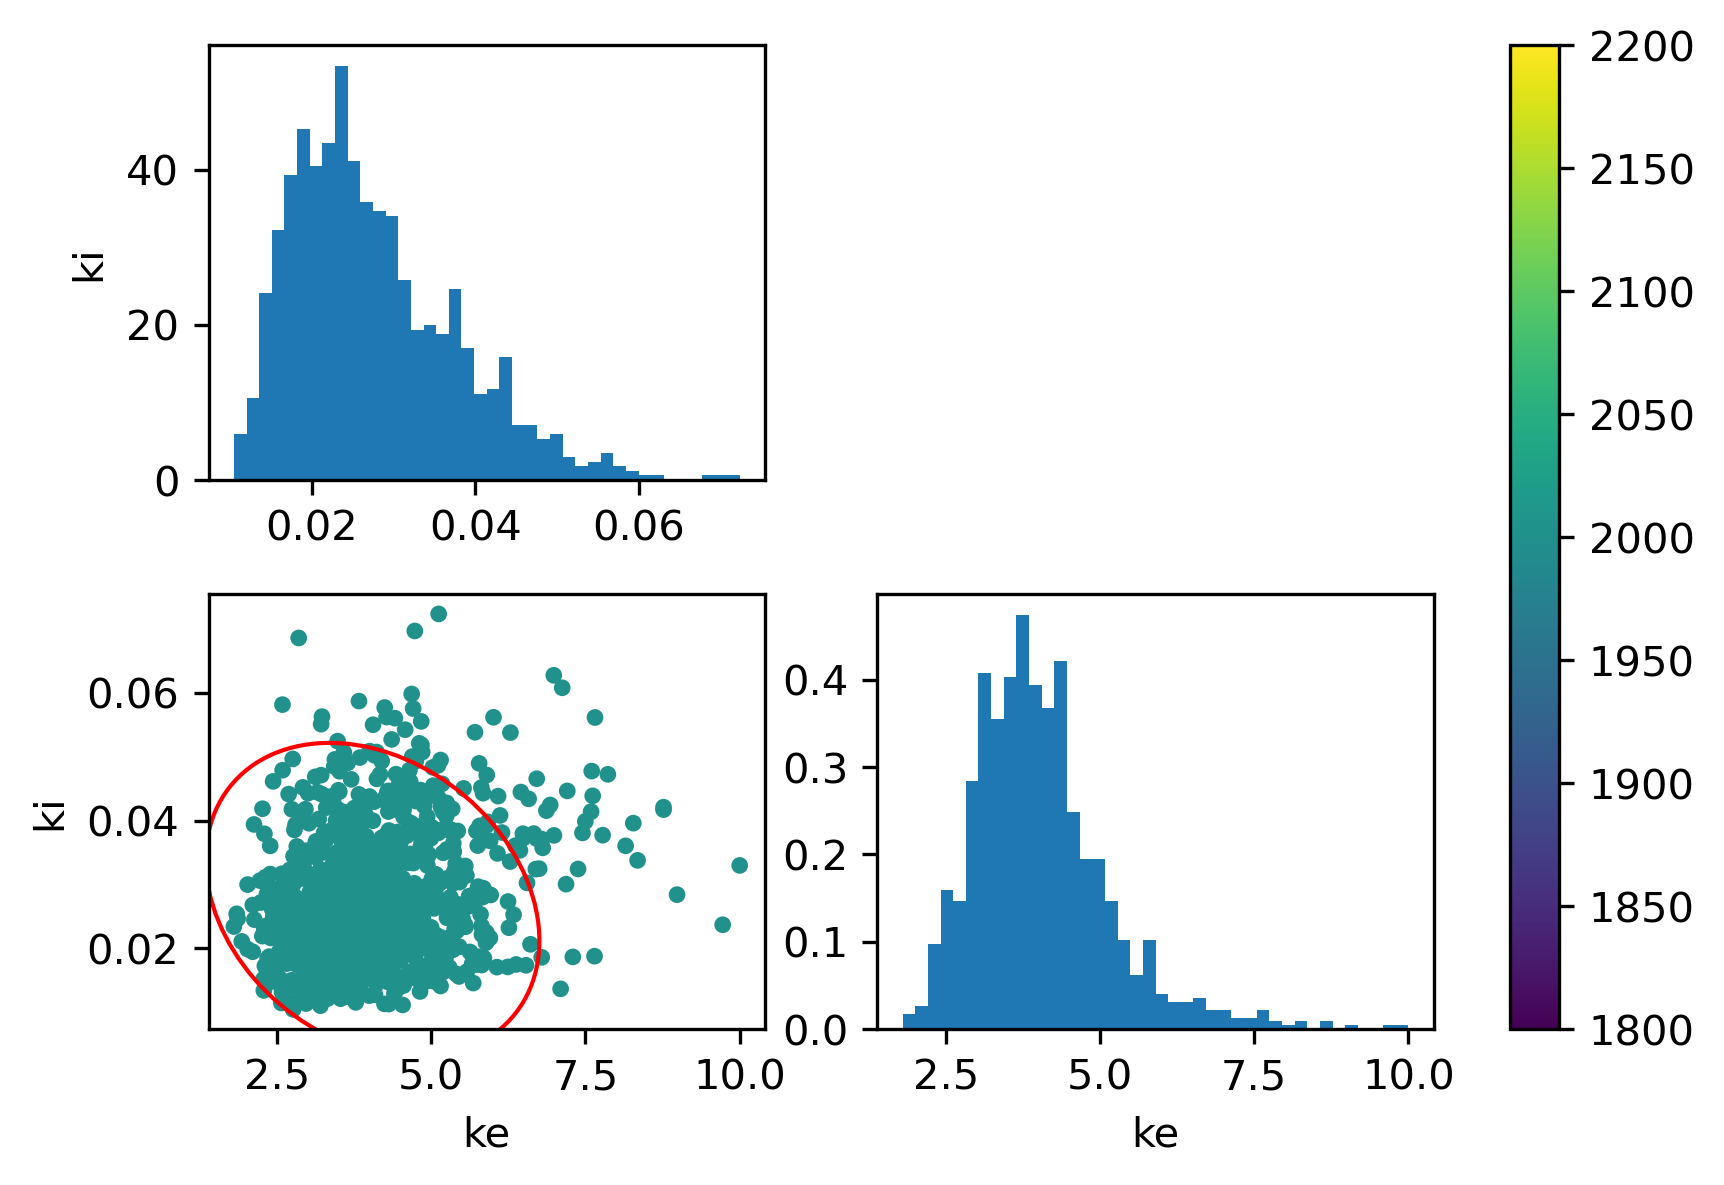

In [9]:
chain_2obj.parplot()

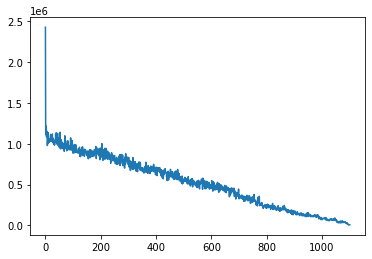

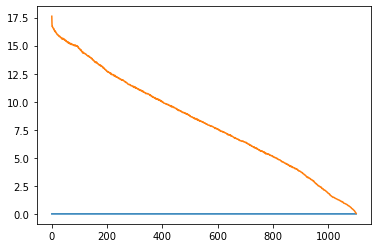

In [10]:
plt.figure()
chain_2obj.check_objfun_convergence()
plt.plot(chain_2obj.objfun_acc)

plt.figure()
chain_2obj.check_parameter_convergence()
plt.plot(chain_2obj.par_acc)